In [4]:
import pandas as pd
titanic_df = pd.read_csv("titanic.csv")

In [3]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 Univariate Analysis
 Example: Plotting a histogram of passenger ages

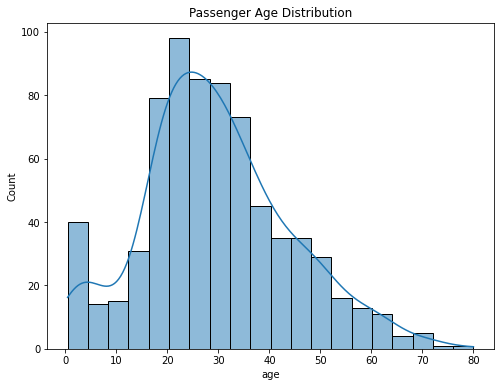

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='age', kde=True)
plt.title('Passenger Age Distribution')
plt.show()




Bi-Variate Analysis
Plotting a bar plot of survival by passenger class

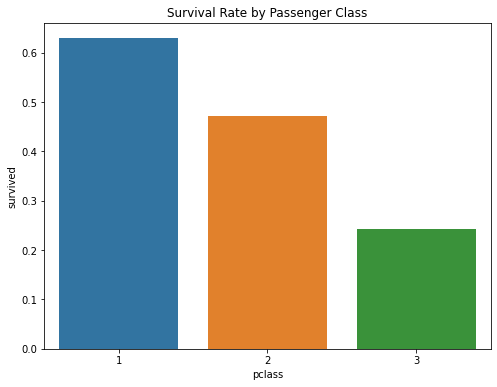

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic_df, x='pclass', y='survived', ci=None)
plt.title('Survival Rate by Passenger Class')
plt.show()

Multi-Variate Analysis
Plotting a scatter plot of fare versus age colored by survival

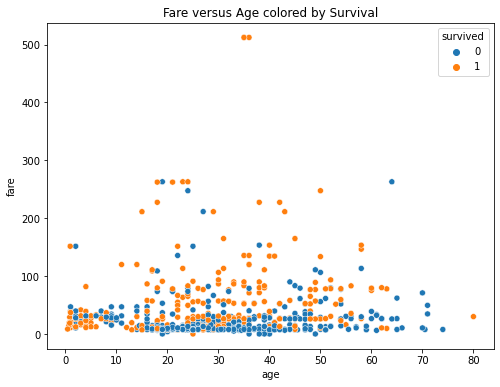

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_df, x='age', y='fare', hue='survived')
plt.title('Fare versus Age colored by Survival')
plt.show()

descriptive statistics

In [10]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 Handle missing values

In [5]:
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)
print(titanic_df)


     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man     

In [6]:
titanic_df['deck'].fillna("Unkown", inplace=True)
print(titanic_df)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male    deck  embark_town alive  alone  
0     Third    man  

Find and replace outliers

In [7]:
Q1 = titanic_df['fare'].quantile(0.25)
Q3 = titanic_df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

titanic_df['fare'] = titanic_df['fare'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
print(titanic_df)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  65.6344        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male    deck  embark_town alive  alone  
0     Third    man  

Check for categorical columns and perform encoding

In [10]:
encoded_df = pd.get_dummies(titanic_df, columns=['sex','embarked','class','who','adult_male','deck','embark_town','alive','alone'])
print(encoded_df)

     survived  pclass        age  sibsp  parch     fare  sex_female  sex_male  \
0           0       3  22.000000      1      0   7.2500           0         1   
1           1       1  38.000000      1      0  65.6344           1         0   
2           1       3  26.000000      0      0   7.9250           1         0   
3           1       1  35.000000      1      0  53.1000           1         0   
4           0       3  35.000000      0      0   8.0500           0         1   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886         0       2  27.000000      0      0  13.0000           0         1   
887         1       1  19.000000      0      0  30.0000           1         0   
888         0       3  29.699118      1      2  23.4500           1         0   
889         1       1  26.000000      0      0  30.0000           0         1   
890         0       3  32.000000      0      0   7.7500           0         1   

     embarked_C  embarked_Q

Split the data into dependent and independent variables

In [12]:
import pandas as pd
features = titanic_df.drop('survived', axis=1)
target = titanic_df['survived']
print(features.head())
print(target.head())

   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  65.6344        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male    deck  embark_town alive  alone  
0        True  Unkown  Southampton    no  False  
1       False       C    Cherbourg   yes  False  
2       False  Unkown  Southampton   yes   True  
3       False       C  Southampton   yes  False  
4        True  Unkown  Southampton    no   True  
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


Scale the independent variables

In [17]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(encoded_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=encoded_df.columns)
print(scaled_features_df.head())

   survived  pclass       age  sibsp  parch      fare  sex_female  sex_male  \
0       0.0     1.0  0.271174  0.125    0.0  0.110460         0.0       1.0   
1       1.0     0.0  0.472229  0.125    0.0  1.000000         1.0       0.0   
2       1.0     1.0  0.321438  0.000    0.0  0.120745         1.0       0.0   
3       1.0     0.0  0.434531  0.125    0.0  0.809027         1.0       0.0   
4       0.0     1.0  0.434531  0.000    0.0  0.122649         0.0       1.0   

   embarked_C  embarked_Q  ...  deck_F  deck_G  deck_Unkown  \
0         0.0         0.0  ...     0.0     0.0          1.0   
1         1.0         0.0  ...     0.0     0.0          0.0   
2         0.0         0.0  ...     0.0     0.0          1.0   
3         0.0         0.0  ...     0.0     0.0          0.0   
4         0.0         0.0  ...     0.0     0.0          1.0   

   embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  \
0                    0.0                     0.0                     

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 34)
Testing set shape: (179, 34)
